# Stock Options Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import yfinance as yf
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)  # Set to display all columns of dataframes


## Options Data

In [2]:
current_dir = os.getcwd()
# print("Current directory:", current_dir)

# Read the CSV file into a DataFrame
option_data_file = '../data/AMD_OptionPrices.csv'

options_data = pd.read_csv(option_data_file)


In [3]:
options_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889630 entries, 0 to 889629
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   secid             889630 non-null  int64  
 1   date              889630 non-null  object 
 2   symbol            889630 non-null  object 
 3   symbol_flag       889630 non-null  int64  
 4   exdate            889630 non-null  object 
 5   last_date         822401 non-null  object 
 6   cp_flag           889630 non-null  object 
 7   strike_price      889630 non-null  int64  
 8   best_bid          889630 non-null  float64
 9   best_offer        889630 non-null  float64
 10  volume            889630 non-null  int64  
 11  open_interest     889630 non-null  int64  
 12  impl_volatility   735098 non-null  float64
 13  delta             735098 non-null  float64
 14  gamma             735098 non-null  float64
 15  vega              735098 non-null  float64
 16  theta             73

In [4]:
options_data.isnull().sum()

secid                    0
date                     0
symbol                   0
symbol_flag              0
exdate                   0
last_date            67229
cp_flag                  0
strike_price             0
best_bid                 0
best_offer               0
volume                   0
open_interest            0
impl_volatility     154532
delta               154532
gamma               154532
vega                154532
theta               154532
optionid                 0
cfadj                    0
am_settlement            0
contract_size            0
ss_flag                  0
forward_price       889630
expiry_indicator    551044
root                889630
suffix              889630
cusip                    0
ticker                   0
sic                      0
index_flag               0
exchange_d               0
class               889630
issue_type               0
industry_group      889630
issuer                   0
div_convention      889630
exercise_style           0
a

In [5]:
# options_data.head()

#### Keep relevent features, drop others

Drop all columns with all missing values and unnecessary categorical columns.

After dropping columns that do not have values, we have the remainging columns as below. We can drop more columns as we understand the nature of dataset and those columns may not influence our machine learning model. 

|secid:| Security ID, a unique identifier for each security.|
|---|---|
|date:| Date of the options data.|
|symbol:| Symbol of the security.|
|symbol_flag:| Flag indicating the type of symbol.|
|exdate:| Expiration date of the option.|
|last_date:| Last trading date of the option.|
|cp_flag:| Call (C) or Put (P) option flag.|
|strike_price:| Strike price of the option.|
|best_bid:| Best bid price for the option.|
|best_offer:| Best offer price for the option.|
|volume: Volume| of contracts traded.|
|open_interest:| Open interest for the option.|
|impl_volatility:| Implied volatility of the option.|
|delta:| Delta value of the option.|
|gamma:| Gamma value of the option.|
|vega:| Vega value of the option.|
|theta:| Theta value of the option.|
|optionid:| Option ID, a unique identifier for each option.|
|cfadj:| Adjustment factor for cash flow.|
|am_settlement:| American-style settlement flag.|
|contract_size:| Size of the contract.|
|ss_flag:| Special security flag.|
|expiry_indicator:| Expiry indicator, 'w' meaning weekly|
|cusip:| CUSIP number, a unique identifier for securities in the U.S. and Canada.|
|ticker: | Ticker symbol of the security.|
|sic:| Standard Industrial Classification (SIC) code.|
|index_flag:| Index security flag.|
|exchange_d:| Exchange identifier.|
|issue_type:| Type of issue.|
|industry_group:| Industry group.|
|issuer:| Issuer of the security.|
|exercise_style:| Exercise style of the option (e.g., American or European).|

In [6]:
# Drop all columns with all missing values
options_data.dropna(axis=1, how='all', inplace=True)

In [7]:
# Drop some more categorical columns that are not necessary
# columns_to_drop =['secid', 'symbol', 'symbol_flag', 'last_date', 'optionid',
#                   'cfadj', 'am_settlement', 'ss_flag', 'expiry_indicator', 
#                   'exchange_d', 'issue_type', 'industry_group', 'issuer',
#                   'cusip', 'sic', 'index_flag', 'exercise_style'] 
# options_data = options_data.drop(columns=columns_to_drop)

# Keep relevent columns only
columns_to_keep = ['date', 'symbol', 'exdate', 'cp_flag', 'strike_price',
                   'best_bid', 'best_offer', 'volume', 'open_interest',
                   'impl_volatility', 'delta', 'gamma', 'vega', 'theta', 
                   'optionid', 'contract_size', 'ticker']
options_data = options_data[columns_to_keep]



In [8]:
options_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889630 entries, 0 to 889629
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             889630 non-null  object 
 1   symbol           889630 non-null  object 
 2   exdate           889630 non-null  object 
 3   cp_flag          889630 non-null  object 
 4   strike_price     889630 non-null  int64  
 5   best_bid         889630 non-null  float64
 6   best_offer       889630 non-null  float64
 7   volume           889630 non-null  int64  
 8   open_interest    889630 non-null  int64  
 9   impl_volatility  735098 non-null  float64
 10  delta            735098 non-null  float64
 11  gamma            735098 non-null  float64
 12  vega             735098 non-null  float64
 13  theta            735098 non-null  float64
 14  optionid         889630 non-null  int64  
 15  contract_size    889630 non-null  int64  
 16  ticker           889630 non-null  obje

#### Show some informations

In [9]:
# Explore categorical columns
print("\nUnique values in cp_flag column:", options_data['cp_flag'].unique())
print("\nUnique values in ticker column:", options_data['ticker'].unique())
print("\nUnique values in contract_size column:", options_data['contract_size'].unique())

unique_open_interest = options_data['open_interest'].unique()
print("\nUnique values in open_interest column:", options_data['open_interest'].unique())



Unique values in cp_flag column: ['C' 'P']

Unique values in ticker column: ['AMD']

Unique values in contract_size column: [100 172]

Unique values in open_interest column: [ 6736   986  2531 ... 25598 25807 22584]


***open_interest***
ref: https://www.investopedia.com/terms/o/openinterest.asp#:~:text=Open%20interest%20is%20the%20total,tracking%20the%20total%20volume%20traded.


In [10]:
# Explore numerical columns
print("\nSummary statistics of numerical columns:\n", options_data.describe())


Summary statistics of numerical columns:
         strike_price       best_bid     best_offer         volume  \
count  889630.000000  889630.000000  889630.000000  889630.000000   
mean   115067.209964      21.940940      22.970635     336.157743   
std     56998.906525      32.155602      32.910917    2203.121594   
min      3000.000000       0.000000       0.010000       0.000000   
25%     76000.000000       0.870000       1.270000       0.000000   
50%    101000.000000       8.050000       8.800000       4.000000   
75%    145000.000000      30.250000      31.950000      60.000000   
max    340000.000000     242.900000     246.000000  211655.000000   

       open_interest  impl_volatility          delta          gamma  \
count  889630.000000    735098.000000  735098.000000  735098.000000   
mean     1965.599001         0.631749      -0.003594       0.012767   
std      5095.645285         0.319834       0.589141       0.015738   
min         0.000000         0.128793      -0.99999

In [11]:
# Double-check null values
options_data.isnull().sum()

# We observed that there are some missing values of the implied volatility and the Greeks. 

date                    0
symbol                  0
exdate                  0
cp_flag                 0
strike_price            0
best_bid                0
best_offer              0
volume                  0
open_interest           0
impl_volatility    154532
delta              154532
gamma              154532
vega               154532
theta              154532
optionid                0
contract_size           0
ticker                  0
dtype: int64

#### Convert datatime

In [12]:
options_data['date'] = pd.to_datetime(options_data['date'])
options_data['exdate'] = pd.to_datetime(options_data['exdate'])


#### Check for dupplicates

In [13]:
options_data.drop_duplicates(inplace=True)

In [14]:
options_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889630 entries, 0 to 889629
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             889630 non-null  datetime64[ns]
 1   symbol           889630 non-null  object        
 2   exdate           889630 non-null  datetime64[ns]
 3   cp_flag          889630 non-null  object        
 4   strike_price     889630 non-null  int64         
 5   best_bid         889630 non-null  float64       
 6   best_offer       889630 non-null  float64       
 7   volume           889630 non-null  int64         
 8   open_interest    889630 non-null  int64         
 9   impl_volatility  735098 non-null  float64       
 10  delta            735098 non-null  float64       
 11  gamma            735098 non-null  float64       
 12  vega             735098 non-null  float64       
 13  theta            735098 non-null  float64       
 14  optionid         889

#### Check missing values

We observed that there are significant number of missing values of the columns : impl_volatility, and the Greeks. let us drop all these rows

In [15]:
options_data.isnull().sum()

date                    0
symbol                  0
exdate                  0
cp_flag                 0
strike_price            0
best_bid                0
best_offer              0
volume                  0
open_interest           0
impl_volatility    154532
delta              154532
gamma              154532
vega               154532
theta              154532
optionid                0
contract_size           0
ticker                  0
dtype: int64

#### Drop NA of Implied Volatility and the Greeks
We need more investigation about the Greeks and the implied volatility, so let us just drop the missing values for now and study based on what we have. In the future, when we have better understanding about them, we may interpolate data instead of dropping them, which reduce the size ot the dataset significantly.

Ref: 
1.https://www.investopedia.com/terms/i/iv.asp#:~:text=Volatility%20(IV)%20Works-,Implied%20volatility%20is%20the%20market's%20forecast%20of%20a%20likely%20movement,the%20symbol%20%CF%83%20(sigma).

2. WQU

3. https://www.investopedia.com/trading/getting-to-know-the-greeks/#:~:text=Option%20Greeks%20are%20financial%20metrics,price%20of%20the%20underlying%20asset.


Implied Volatility: this is a significantly important regarding to stock options, which is the key to the options's price and also influence stock price. Other numeric inputs like, stock price, strike level, risk-free rate, and dividend yield, are easily observed in the market.


In [16]:
# Drop rows with missing values in the specified columns
options_data.dropna(subset=['impl_volatility', 'delta', 'gamma', 'vega', 'theta'], inplace=True)


In [17]:
options_data.describe()

,date,exdate,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,contract_size
count,735098,735098,735098.000000,735098.000000,735098.000000,735098.000000,735098.000000,735098.000000,735098.000000,735098.000000,735098.000000,735098.000000,7.350980e+05,735098.0
mean,2022-01-14 00:49:40.226310144,2022-06-05 14:01:26.603962880,107782.320861,17.550136,18.279313,360.964367,2266.531514,0.631749,-0.003594,0.012767,11.431475,-17.026441,1.424915e+08,100.0
min,2021-01-04 00:00:00,2021-01-08 00:00:00,5000.000000,0.000000,0.010000,0.000000,0.000000,0.128793,-0.999993,0.000002,0.000145,-536.194300,1.238672e+08,100.0
25%,2021-07-13 00:00:00,2021-11-05 00:00:00,75000.000000,0.730000,0.860000,0.000000,41.000000,0.470010,-0.450642,0.003080,1.933415,-21.266675,1.386205e+08,100.0
50%,2022-01-13 00:00:00,2022-05-27 00:00:00,97500.000000,6.200000,6.650000,9.000000,344.000000,0.536671,0.001253,0.007511,6.790154,-9.280466,1.426349e+08,100.0
75%,2022-07-13 00:00:00,2022-12-23 00:00:00,135000.000000,23.000000,24.150000,87.000000,1856.000000,0.661242,0.431689,0.016869,15.790192,-4.349716,1.462112e+08,100.0
max,2023-02-28 00:00:00,2025-01-17 00:00:00,300000.000000,241.650000,244.850000,211655.000000,144336.000000,2.999485,0.999998,0.403276,94.449300,2.734231,1.528866e+08,100.0
std,NaN,NaN,49155.316450,26.726747,27.434994,2157.840185,5455.451053,0.319834,0.589141,0.015738,13.231583,24.325666,4.840404e+06,0.0


In [18]:
options_data.head()

,date,symbol,exdate,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,contract_size,ticker
0,2021-01-04,AMD 210108C100000,2021-01-08,C,100000,0.19,0.20,13744,6736,0.542276,0.083361,0.029276,1.481987,-36.67902,137234995,100,AMD
1,2021-01-04,AMD 210108C101000,2021-01-08,C,101000,0.14,0.15,4229,986,0.553831,0.063693,0.023335,1.204094,-30.49360,137273151,100,AMD
2,2021-01-04,AMD 210108C102000,2021-01-08,C,102000,0.10,0.11,3729,2531,0.562234,0.047623,0.018270,0.959573,-24.60440,137273152,100,AMD
3,2021-01-04,AMD 210108C103000,2021-01-08,C,103000,0.07,0.08,688,706,0.569473,0.035131,0.014096,0.750143,-19.47490,137273153,100,AMD
4,2021-01-04,AMD 210108C104000,2021-01-08,C,104000,0.05,0.06,376,1070,0.579418,0.026341,0.010916,0.589210,-15.61293,137273154,100,AMD


In [19]:
options_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735098 entries, 0 to 889549
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             735098 non-null  datetime64[ns]
 1   symbol           735098 non-null  object        
 2   exdate           735098 non-null  datetime64[ns]
 3   cp_flag          735098 non-null  object        
 4   strike_price     735098 non-null  int64         
 5   best_bid         735098 non-null  float64       
 6   best_offer       735098 non-null  float64       
 7   volume           735098 non-null  int64         
 8   open_interest    735098 non-null  int64         
 9   impl_volatility  735098 non-null  float64       
 10  delta            735098 non-null  float64       
 11  gamma            735098 non-null  float64       
 12  vega             735098 non-null  float64       
 13  theta            735098 non-null  float64       
 14  optionid         735098 n

### Compute dte and Bid/Ask Spread

In [20]:
options_data['dte'] = (options_data['exdate'] - options_data['date']).dt.days
options_data['bid_ask_spread'] = options_data.best_offer-options_data.best_bid

In [21]:
options_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735098 entries, 0 to 889549
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             735098 non-null  datetime64[ns]
 1   symbol           735098 non-null  object        
 2   exdate           735098 non-null  datetime64[ns]
 3   cp_flag          735098 non-null  object        
 4   strike_price     735098 non-null  int64         
 5   best_bid         735098 non-null  float64       
 6   best_offer       735098 non-null  float64       
 7   volume           735098 non-null  int64         
 8   open_interest    735098 non-null  int64         
 9   impl_volatility  735098 non-null  float64       
 10  delta            735098 non-null  float64       
 11  gamma            735098 non-null  float64       
 12  vega             735098 non-null  float64       
 13  theta            735098 non-null  float64       
 14  optionid         735098 n

In [22]:
options_data.isnull().sum()

date               0
symbol             0
exdate             0
cp_flag            0
strike_price       0
best_bid           0
best_offer         0
volume             0
open_interest      0
impl_volatility    0
delta              0
gamma              0
vega               0
theta              0
optionid           0
contract_size      0
ticker             0
dte                0
bid_ask_spread     0
dtype: int64

### Save cleaned options data

In [23]:
# Sort data by date
options_data = options_data.sort_values(by='date')

# cleaned_option_data_file = '../data/AMD_option_data_2015.1.1_2023.2.28_cleaned.csv'
cleaned_option_data_file = '../data/1.AMD_OptionPrices_cleaned.csv'

if os.path.exists(cleaned_option_data_file):
    # If file exists, load it directly
    print('Cleaned options data saved')
else:    
    # Save cleaned options data as csv
    options_data.to_csv(cleaned_option_data_file, index=False)
    
print(options_data.info())

Cleaned options data saved
<class 'pandas.core.frame.DataFrame'>
Index: 735098 entries, 0 to 889549
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             735098 non-null  datetime64[ns]
 1   symbol           735098 non-null  object        
 2   exdate           735098 non-null  datetime64[ns]
 3   cp_flag          735098 non-null  object        
 4   strike_price     735098 non-null  int64         
 5   best_bid         735098 non-null  float64       
 6   best_offer       735098 non-null  float64       
 7   volume           735098 non-null  int64         
 8   open_interest    735098 non-null  int64         
 9   impl_volatility  735098 non-null  float64       
 10  delta            735098 non-null  float64       
 11  gamma            735098 non-null  float64       
 12  vega             735098 non-null  float64       
 13  theta            735098 non-null  float64       
 14

In [24]:
start_date = options_data['date'].min()
end_date = (pd.to_datetime(options_data['date'].max()) + pd.Timedelta(days=1)).date()

print(f'start_date: {start_date}, end_date: {end_date}')

start_date: 2021-01-04 00:00:00, end_date: 2023-03-01


## Stock Data
We download corresponding stock data from Yahoo finance

In [25]:
tickers = options_data['ticker'].unique()

print(tickers)

# Download historical stock data of the correspoonding ticker
stock_data = {}
for ticker in tickers:
    start_date = options_data['date'].min()
    end_date = (pd.to_datetime(options_data['date'].max()) + pd.Timedelta(days=1)).date()

    print(f'Downloading data of {ticker} from start_date: {start_date} to end_date:{end_date}')
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)
    stock_data[ticker]['ticker'] = ticker  # Add a new column 'Ticker' with ticker symbol
    # print(stock_data[ticker].info())


['AMD']


[*********************100%%**********************]  1 of 1 completed


### Merge stock data

If there are more than one ticker, merge the data into one single file

In [26]:
# Combine all stock data into a single DataFrame
merged_stock_data = pd.concat(stock_data.values())
merged_stock_data['date'] = merged_stock_data.index
merged_stock_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 2021-01-04 to 2023-02-28
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       542 non-null    float64       
 1   High       542 non-null    float64       
 2   Low        542 non-null    float64       
 3   Close      542 non-null    float64       
 4   Adj Close  542 non-null    float64       
 5   Volume     542 non-null    int64         
 6   ticker     542 non-null    object        
 7   date       542 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 38.1+ KB


In [27]:
merged_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 2021-01-04 to 2023-02-28
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       542 non-null    float64       
 1   High       542 non-null    float64       
 2   Low        542 non-null    float64       
 3   Close      542 non-null    float64       
 4   Adj Close  542 non-null    float64       
 5   Volume     542 non-null    int64         
 6   ticker     542 non-null    object        
 7   date       542 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 38.1+ KB


### Clean stock data

In [28]:
# Drop rows with missing values in the specified columns
merged_stock_data.dropna(inplace=True)

# And sort values
merged_stock_data=merged_stock_data.sort_values(by='date')

In [29]:
merged_stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,ticker,date
Date,,,,,,,,
2021-01-04,92.110001,96.059998,90.919998,92.300003,92.300003,51802600,AMD,2021-01-04
2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000,AMD,2021-01-05
2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700,AMD,2021-01-06
2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200,AMD,2021-01-07
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400,AMD,2021-01-08


In [30]:
merged_stock_data['ticker'].unique()

array(['AMD'], dtype=object)

### Financial Analysis of Stock data

#### Compute daily stock return

In [31]:
stock_data=merged_stock_data.copy()

mapper={'Open':'stock_open', 
        'High':'stock_high', 
        'Low': 'stock_low', 
        'Close':'stock_close', 
        'Adj Close':'stock_price', 
        'Volume':'stock_volume'}
stock_data=stock_data.rename(columns=mapper).copy()

# Calculate daily returns
stock_data['daily_returns'] = stock_data['stock_price'].pct_change()

# Replace NA values with 0
stock_data.fillna(0, inplace=True)


In [32]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 2021-01-04 to 2023-02-28
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   stock_open     542 non-null    float64       
 1   stock_high     542 non-null    float64       
 2   stock_low      542 non-null    float64       
 3   stock_close    542 non-null    float64       
 4   stock_price    542 non-null    float64       
 5   stock_volume   542 non-null    int64         
 6   ticker         542 non-null    object        
 7   date           542 non-null    datetime64[ns]
 8   daily_returns  542 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 42.3+ KB


#### Compute 30 days rolling volatility

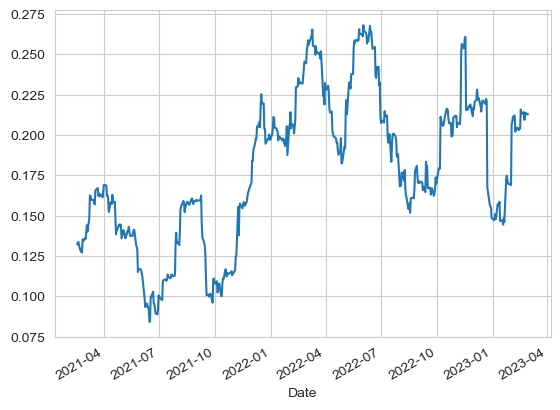

In [33]:
# Define the minimum of periods to consider 
min_periods = 30

# Calculate the volatility. The min_periods parameter ensures that the rolling standard deviation is only calculated when at least 75 non-null data points are in the window.
stock_data['vol_30'] = stock_data['daily_returns'].rolling(min_periods).std()

# Scale the rolling standard deviation by the square root of the number of periods (days) to annualize it
stock_data['vol_30'] = stock_data['vol_30'] * np.sqrt(min_periods) 

# Remark: vol is the standard deviation; sqrt was used, so the annualized parameter should also  be sqrt_ed

# Plot the volatility
stock_data['vol_30'].plot()

# Show the plot
plt.show()

#### Compute 60 days rolling volatility

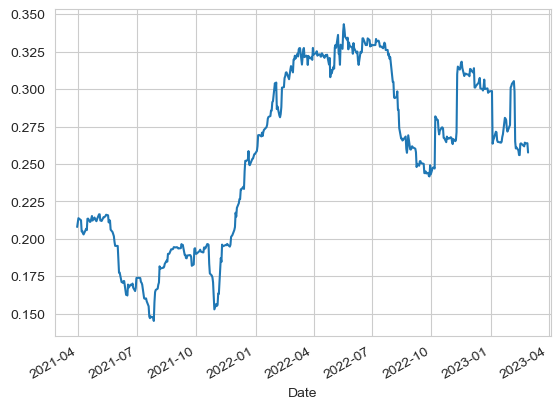

In [34]:
# Define the minimum of periods to consider 
min_periods = 60

# Calculate the volatility. The min_periods parameter ensures that the rolling standard deviation is only calculated when at least 75 non-null data points are in the window.
stock_data['vol_60'] = stock_data['daily_returns'].rolling(min_periods).std()

# Scale the rolling standard deviation by the square root of the number of periods (days) to annualize it
stock_data['vol_60'] = stock_data['vol_60'] * np.sqrt(min_periods) 

# Remark: vol is the standard deviation; sqrt was used, so the annualized parameter should also  be sqrt_ed

# Plot the volatility
stock_data['vol_60'].plot()

# Show the plot
plt.show()

#### Compute 90 days rolling volatility

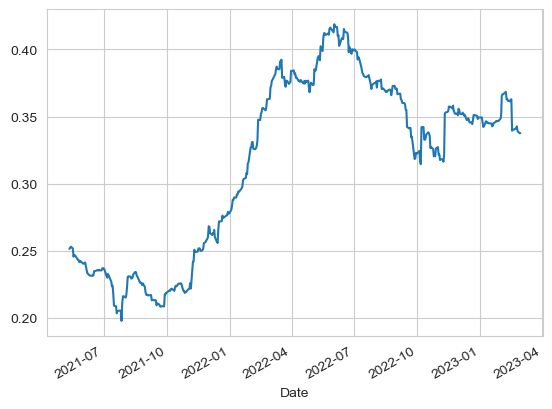

In [35]:
# Define the minimum of periods to consider 
min_periods = 90

# Calculate the volatility. The min_periods parameter ensures that the rolling standard deviation is only calculated when at least 75 non-null data points are in the window.
stock_data['vol_90'] = stock_data['daily_returns'].rolling(min_periods).std()

# Scale the rolling standard deviation by the square root of the number of periods (days) to annualize it
stock_data['vol_90'] = stock_data['vol_90'] * np.sqrt(min_periods) 

# Remark: vol is the standard deviation; sqrt was used, so the annualized parameter should also  be sqrt_ed

# Plot the volatility
stock_data['vol_90'].plot()

# Show the plot
plt.show()

### Fill NA by zeros


In [36]:
# Replace NA values with 0
stock_data.fillna(0, inplace=True)

In [37]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 2021-01-04 to 2023-02-28
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   stock_open     542 non-null    float64       
 1   stock_high     542 non-null    float64       
 2   stock_low      542 non-null    float64       
 3   stock_close    542 non-null    float64       
 4   stock_price    542 non-null    float64       
 5   stock_volume   542 non-null    int64         
 6   ticker         542 non-null    object        
 7   date           542 non-null    datetime64[ns]
 8   daily_returns  542 non-null    float64       
 9   vol_30         542 non-null    float64       
 10  vol_60         542 non-null    float64       
 11  vol_90         542 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 55.0+ KB


In [38]:
stock_data.head()

,stock_open,stock_high,stock_low,stock_close,stock_price,stock_volume,ticker,date,daily_returns,vol_30,vol_60,vol_90
Date,,,,,,,,,,,,
2021-01-04,92.110001,96.059998,90.919998,92.300003,92.300003,51802600,AMD,2021-01-04,0.000000,0.0,0.0,0.0
2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000,AMD,2021-01-05,0.005092,0.0,0.0,0.0
2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700,AMD,2021-01-06,-0.026302,0.0,0.0,0.0
2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200,AMD,2021-01-07,0.053471,0.0,0.0,0.0
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400,AMD,2021-01-08,-0.006095,0.0,0.0,0.0


### Save Cleaned Stock data

In [39]:
# cleaned_stock_data_file = '../data/AMD_stock_data_2015.1.1_2023.2.28_cleaned.csv'
cleaned_stock_data_file = '../data/2.AMD_stock_prices_cleaned.csv'

if os.path.exists(cleaned_stock_data_file):
    # If file exists, load it directly
    print('Cleaned stock data saved')
else:    
    # Save cleaned options data as csv
    stock_data.to_csv(cleaned_stock_data_file, index=False)
    
print(stock_data.info())

Cleaned stock data saved
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 2021-01-04 to 2023-02-28
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   stock_open     542 non-null    float64       
 1   stock_high     542 non-null    float64       
 2   stock_low      542 non-null    float64       
 3   stock_close    542 non-null    float64       
 4   stock_price    542 non-null    float64       
 5   stock_volume   542 non-null    int64         
 6   ticker         542 non-null    object        
 7   date           542 non-null    datetime64[ns]
 8   daily_returns  542 non-null    float64       
 9   vol_30         542 non-null    float64       
 10  vol_60         542 non-null    float64       
 11  vol_90         542 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 55.0+ KB
None


## Risk-Free Rate

We download 10-year Treasury bond from Yahoo Finance to represent risk-free rate

In [40]:
def get_risk_free_rate(start_date, end_date):
    """
    Fetches historical data for the 10-year Treasury bond from Yahoo Finance and computes the risk-free rate.
    Returns the risk-free rate as a percentage.
    """
    # Ticker symbol for the 10-year Treasury bond
    ticker_symbol = "^TNX"

    # Fetch historical data
    treasury_bond_data = yf.download(ticker_symbol, 
                                     start=start_date, 
                                     end=end_date)
    treasury_bond_data['date'] = treasury_bond_data.index
    treasury_bond_data=treasury_bond_data[['date', 'Adj Close']]
    treasury_bond_data=treasury_bond_data.rename(columns={'Adj Close':'risk_free_rate'}).copy()

    return treasury_bond_data


start_date = stock_data['date'].min()
end_date = (pd.to_datetime(stock_data['date'].max()) + pd.Timedelta(days=1)).date()

treasury_bond_data = get_risk_free_rate(start_date, end_date)


print(treasury_bond_data.describe())

[*********************100%%**********************]  1 of 1 completed

                                date  risk_free_rate
count                            542      542.000000
mean   2022-01-29 15:56:27.453874432        2.301026
min              2021-01-04 00:00:00        0.917000
25%              2021-07-19 06:00:00        1.494000
50%              2022-01-29 12:00:00        1.791500
75%              2022-08-14 06:00:00        3.119750
max              2023-02-28 00:00:00        4.234000
std                              NaN        0.963000


In [41]:
treasury_bond_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 2021-01-04 to 2023-02-28
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            542 non-null    datetime64[ns]
 1   risk_free_rate  542 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.7 KB


In [42]:
TNX_data_file = '../data/3.TNX21_23.csv'
treasury_bond_data.to_csv(TNX_data_file, index=False)

## Merge Risk-Free Rate to stock data

In [43]:
# Convert 'date' column to datetime type in the DataFrame
stock_data['date'] = pd.to_datetime(stock_data['date'])
treasury_bond_data['date'] = pd.to_datetime(treasury_bond_data['date'])

# Merge options data and stock data based on common columns (ticker and date)
stock_data = pd.merge(stock_data, treasury_bond_data, on=['date'], how='left')

# Print or further process the combined data
print(stock_data)

     stock_open  stock_high  stock_low  stock_close  stock_price  \
0     92.110001   96.059998  90.919998    92.300003    92.300003   
1     92.099998   93.209999  91.410004    92.769997    92.769997   
2     91.620003   92.279999  89.459999    90.330002    90.330002   
3     91.330002   95.510002  91.199997    95.160004    95.160004   
4     95.980003   96.400002  93.269997    94.580002    94.580002   
..          ...         ...        ...          ...          ...   
537   76.930000   78.129997  75.919998    76.610001    76.610001   
538   80.629997   81.790001  77.970001    79.750000    79.750000   
539   77.750000   78.809998  76.940002    78.089996    78.089996   
540   79.639999   80.120003  78.529999    78.769997    78.769997   
541   77.870003   80.139999  77.419998    78.580002    78.580002   

     stock_volume ticker       date  daily_returns    vol_30    vol_60  \
0        51802600    AMD 2021-01-04       0.000000  0.000000  0.000000   
1        34208000    AMD 2021-01-05

In [44]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   stock_open      542 non-null    float64       
 1   stock_high      542 non-null    float64       
 2   stock_low       542 non-null    float64       
 3   stock_close     542 non-null    float64       
 4   stock_price     542 non-null    float64       
 5   stock_volume    542 non-null    int64         
 6   ticker          542 non-null    object        
 7   date            542 non-null    datetime64[ns]
 8   daily_returns   542 non-null    float64       
 9   vol_30          542 non-null    float64       
 10  vol_60          542 non-null    float64       
 11  vol_90          542 non-null    float64       
 12  risk_free_rate  542 non-null    float64       
dtypes: datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 55.2+ KB


In [45]:
options_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735098 entries, 0 to 889549
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             735098 non-null  datetime64[ns]
 1   symbol           735098 non-null  object        
 2   exdate           735098 non-null  datetime64[ns]
 3   cp_flag          735098 non-null  object        
 4   strike_price     735098 non-null  int64         
 5   best_bid         735098 non-null  float64       
 6   best_offer       735098 non-null  float64       
 7   volume           735098 non-null  int64         
 8   open_interest    735098 non-null  int64         
 9   impl_volatility  735098 non-null  float64       
 10  delta            735098 non-null  float64       
 11  gamma            735098 non-null  float64       
 12  vega             735098 non-null  float64       
 13  theta            735098 non-null  float64       
 14  optionid         735098 n

### Combine options data and stock data

In [46]:
# Convert 'date' column to datetime type in options_data DataFrame
options_data['date'] = pd.to_datetime(options_data['date'])

# Convert 'date' column to datetime type in merged_stock_data DataFrame
stock_data['date'] = pd.to_datetime(stock_data['date'])


# Keep relevent columns of stock data only
columns_to_keep = ['date', 'ticker', 'stock_volume', 'stock_price',
                   'daily_returns', 'vol_30', 'vol_60', 'vol_90', 'risk_free_rate']
stock_data = stock_data[columns_to_keep]

# Merge options data and stock data based on common columns (ticker and date)
df = pd.merge(options_data, stock_data, on=['ticker', 'date'], how='left')

# Print or further process the combined data
print(df)

             date             symbol     exdate cp_flag  strike_price  \
0      2021-01-04  AMD 210108C100000 2021-01-08       C        100000   
1      2021-01-04   AMD 210618P77500 2021-06-18       P         77500   
2      2021-01-04   AMD 210618P75000 2021-06-18       P         75000   
3      2021-01-04   AMD 210618P72500 2021-06-18       P         72500   
4      2021-01-04   AMD 210618P70000 2021-06-18       P         70000   
...           ...                ...        ...     ...           ...   
735093 2023-02-28   AMD 230324C99000 2023-03-24       C         99000   
735094 2023-02-28   AMD 230324P25000 2023-03-24       P         25000   
735095 2023-02-28   AMD 230324P30000 2023-03-24       P         30000   
735096 2023-02-28   AMD 230324P40000 2023-03-24       P         40000   
735097 2023-02-28   AMD 250117P95000 2025-01-17       P         95000   

        best_bid  best_offer  volume  open_interest  impl_volatility  \
0           0.19        0.20   13744           6736

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735098 entries, 0 to 735097
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             735098 non-null  datetime64[ns]
 1   symbol           735098 non-null  object        
 2   exdate           735098 non-null  datetime64[ns]
 3   cp_flag          735098 non-null  object        
 4   strike_price     735098 non-null  int64         
 5   best_bid         735098 non-null  float64       
 6   best_offer       735098 non-null  float64       
 7   volume           735098 non-null  int64         
 8   open_interest    735098 non-null  int64         
 9   impl_volatility  735098 non-null  float64       
 10  delta            735098 non-null  float64       
 11  gamma            735098 non-null  float64       
 12  vega             735098 non-null  float64       
 13  theta            735098 non-null  float64       
 14  optionid         735

In [48]:
df.isnull().sum()

date               0
symbol             0
exdate             0
cp_flag            0
strike_price       0
best_bid           0
best_offer         0
volume             0
open_interest      0
impl_volatility    0
delta              0
gamma              0
vega               0
theta              0
optionid           0
contract_size      0
ticker             0
dte                0
bid_ask_spread     0
stock_volume       0
stock_price        0
daily_returns      0
vol_30             0
vol_60             0
vol_90             0
risk_free_rate     0
dtype: int64

In [49]:
# cleaned_option_stock_data_file = '../data/AMD_option_stock_data_2015.1.1_2023.2.28_cleaned.csv'
cleaned_option_stock_data_file = '../data/4.AMD_option_stock_data_cleaned.csv'


if os.path.exists(cleaned_option_stock_data_file):
    # If file exists, load it directly
    print('Cleaned option and stock data saved')
else:    
    print('Saving cleaned option and stock data')
    # Save cleaned options data as csv
    df.to_csv(cleaned_option_stock_data_file, index=False)
    
print(df.info())

Cleaned option and stock data saved
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735098 entries, 0 to 735097
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             735098 non-null  datetime64[ns]
 1   symbol           735098 non-null  object        
 2   exdate           735098 non-null  datetime64[ns]
 3   cp_flag          735098 non-null  object        
 4   strike_price     735098 non-null  int64         
 5   best_bid         735098 non-null  float64       
 6   best_offer       735098 non-null  float64       
 7   volume           735098 non-null  int64         
 8   open_interest    735098 non-null  int64         
 9   impl_volatility  735098 non-null  float64       
 10  delta            735098 non-null  float64       
 11  gamma            735098 non-null  float64       
 12  vega             735098 non-null  float64       
 13  theta            735098 non-null  floa

# Exploratory Data Analysis

## Reload option data and stock data

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import yfinance as yf
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)  # Set to display all columns of dataframes


current_dir = os.getcwd()
# print("Current directory:", current_dir)

# Read option data and stock data from the CSV file into a DataFrame
data_file = '../data/4.AMD_option_stock_data_cleaned.csv'


if os.path.exists(data_file):
    # If file exists, load it directly
    df = pd.read_csv(data_file)
else:    
    print('Get option data and stock data')

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735098 entries, 0 to 735097
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             735098 non-null  object 
 1   symbol           735098 non-null  object 
 2   exdate           735098 non-null  object 
 3   cp_flag          735098 non-null  object 
 4   strike_price     735098 non-null  int64  
 5   best_bid         735098 non-null  float64
 6   best_offer       735098 non-null  float64
 7   volume           735098 non-null  int64  
 8   open_interest    735098 non-null  int64  
 9   impl_volatility  735098 non-null  float64
 10  delta            735098 non-null  float64
 11  gamma            735098 non-null  float64
 12  vega             735098 non-null  float64
 13  theta            735098 non-null  float64
 14  optionid         735098 non-null  int64  
 15  contract_size    735098 non-null  int64  
 16  ticker           735098 non-null  obje

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 [Text(-100000.0, 0, '2022-10-17'),
  Text(0.0, 0, '2021-01-04'),
  Text(100000.0, 0, '2021-04-13'),
  Text(200000.0, 0, '2021-07-30'),
  Text(300000.0, 0, '2021-11-10'),
  Text(400000.0, 0, '2022-02-14'),
  Text(500000.0, 0, '2022-05-20'),
  Text(600000.0, 0, '2022-09-02'),
  Text(700000.0, 0, '2023-01-10'),
  Text(800000.0, 0, '')])

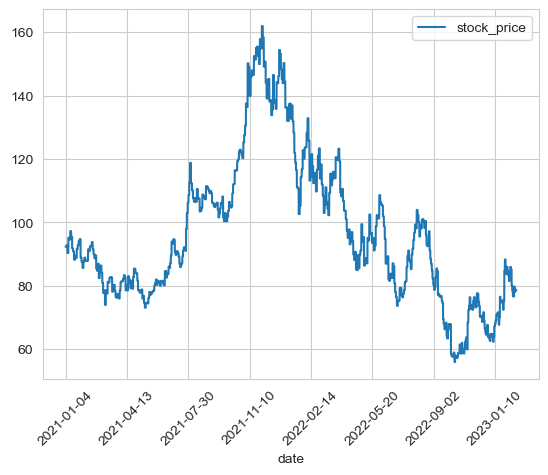

In [51]:
df.plot(x='date', y='stock_price')
plt.xticks(rotation=45)

In [52]:
df['bid_ask_spread'].min()

0.0

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 [Text(-100000.0, 0, '2022-10-17'),
  Text(0.0, 0, '2021-01-04'),
  Text(100000.0, 0, '2021-04-13'),
  Text(200000.0, 0, '2021-07-30'),
  Text(300000.0, 0, '2021-11-10'),
  Text(400000.0, 0, '2022-02-14'),
  Text(500000.0, 0, '2022-05-20'),
  Text(600000.0, 0, '2022-09-02'),
  Text(700000.0, 0, '2023-01-10'),
  Text(800000.0, 0, '')])

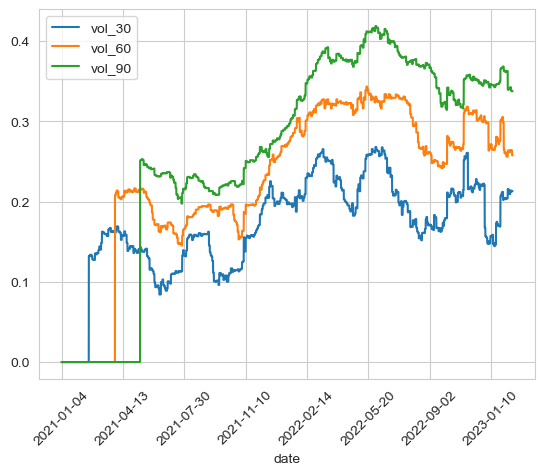

In [53]:
df.plot(x='date', y = ['vol_30', 'vol_60', 'vol_90'])
# df.plot(x='date', y='stock_price')
plt.xticks(rotation=45)

## Clean data

### DateTime columns

In [54]:
# Convert 'date' column to datetime type in options_data DataFrame
df['date'] = pd.to_datetime(df['date'])
df['exdate'] = pd.to_datetime(df['exdate'])


### String data columns

In [55]:
# Convert columns with dtype = object to string
df['cp_flag'] = df['cp_flag'].astype("string")
df['ticker'] = df['ticker'].astype("string")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735098 entries, 0 to 735097
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             735098 non-null  datetime64[ns]
 1   symbol           735098 non-null  object        
 2   exdate           735098 non-null  datetime64[ns]
 3   cp_flag          735098 non-null  string        
 4   strike_price     735098 non-null  int64         
 5   best_bid         735098 non-null  float64       
 6   best_offer       735098 non-null  float64       
 7   volume           735098 non-null  int64         
 8   open_interest    735098 non-null  int64         
 9   impl_volatility  735098 non-null  float64       
 10  delta            735098 non-null  float64       
 11  gamma            735098 non-null  float64       
 12  vega             735098 non-null  float64       
 13  theta            735098 non-null  float64       
 14  optionid         735

In [57]:
# Drop rows with missing values in the specified columns
df.dropna(inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735098 entries, 0 to 735097
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             735098 non-null  datetime64[ns]
 1   symbol           735098 non-null  object        
 2   exdate           735098 non-null  datetime64[ns]
 3   cp_flag          735098 non-null  string        
 4   strike_price     735098 non-null  int64         
 5   best_bid         735098 non-null  float64       
 6   best_offer       735098 non-null  float64       
 7   volume           735098 non-null  int64         
 8   open_interest    735098 non-null  int64         
 9   impl_volatility  735098 non-null  float64       
 10  delta            735098 non-null  float64       
 11  gamma            735098 non-null  float64       
 12  vega             735098 non-null  float64       
 13  theta            735098 non-null  float64       
 14  optionid         735

## Call and Put Analysis

In [59]:
calls = df[(df['ticker']=='AMD') & (df['cp_flag']=='C')]
calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375092 entries, 0 to 735093
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             375092 non-null  datetime64[ns]
 1   symbol           375092 non-null  object        
 2   exdate           375092 non-null  datetime64[ns]
 3   cp_flag          375092 non-null  string        
 4   strike_price     375092 non-null  int64         
 5   best_bid         375092 non-null  float64       
 6   best_offer       375092 non-null  float64       
 7   volume           375092 non-null  int64         
 8   open_interest    375092 non-null  int64         
 9   impl_volatility  375092 non-null  float64       
 10  delta            375092 non-null  float64       
 11  gamma            375092 non-null  float64       
 12  vega             375092 non-null  float64       
 13  theta            375092 non-null  float64       
 14  optionid         375092 n

In [60]:
puts = df[(df['ticker']=='AMD') & (df['cp_flag']=='P')]
puts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360006 entries, 1 to 735097
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             360006 non-null  datetime64[ns]
 1   symbol           360006 non-null  object        
 2   exdate           360006 non-null  datetime64[ns]
 3   cp_flag          360006 non-null  string        
 4   strike_price     360006 non-null  int64         
 5   best_bid         360006 non-null  float64       
 6   best_offer       360006 non-null  float64       
 7   volume           360006 non-null  int64         
 8   open_interest    360006 non-null  int64         
 9   impl_volatility  360006 non-null  float64       
 10  delta            360006 non-null  float64       
 11  gamma            360006 non-null  float64       
 12  vega             360006 non-null  float64       
 13  theta            360006 non-null  float64       
 14  optionid         360006 n

## Implied Volatility Distribution Analysis

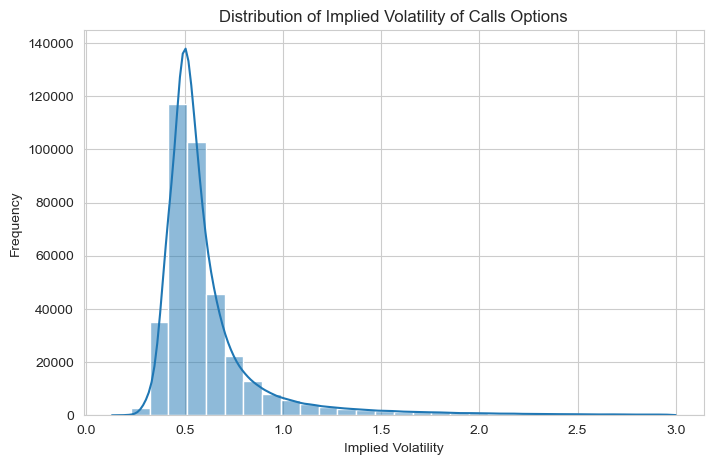

In [61]:
# Explore the distribution of implied volatility
plt.figure(figsize=(8, 5))
sns.histplot(calls['impl_volatility'], bins=30, kde=True)
plt.title('Distribution of Implied Volatility of Calls Options')
plt.xlabel('Implied Volatility')
plt.ylabel('Frequency')
plt.show()

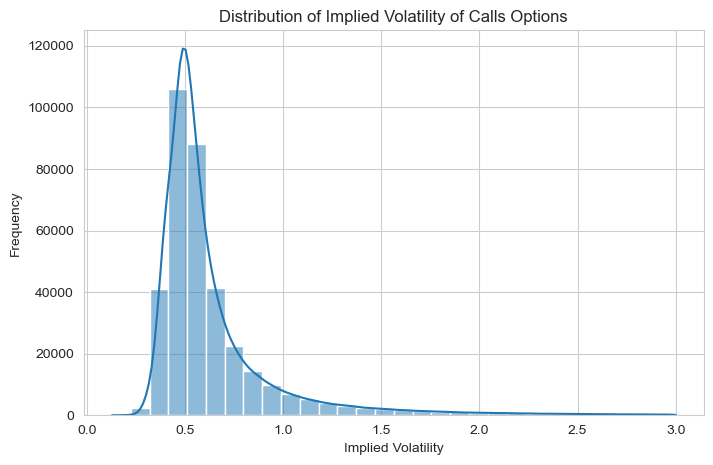

In [62]:
# Explore the distribution of implied volatility
plt.figure(figsize=(8, 5))
sns.histplot(puts['impl_volatility'], bins=30, kde=True)
plt.title('Distribution of Implied Volatility of Calls Options')
plt.xlabel('Implied Volatility')
plt.ylabel('Frequency')
plt.show()

### Implied Volatility vs Bid/Ask Spread

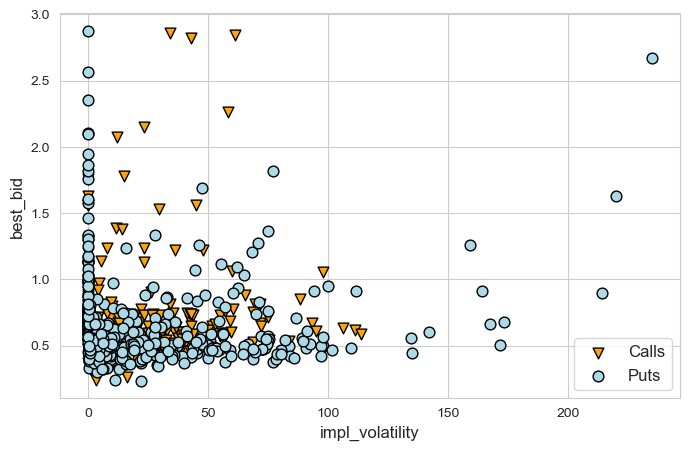

In [63]:
data=df.sample(1000)
plt.figure(figsize=(8,5))


plt.scatter(data.loc[data.cp_flag=='C'].best_bid,
               data.loc[data.cp_flag=='C'].impl_volatility,
               label="Calls",
               marker='v',
               s=60,
               edgecolor='black',
               c='orange')
plt.scatter(data.loc[data.cp_flag=='P'].best_bid,
            data.loc[data.cp_flag=='P'].impl_volatility,
               label="Puts",
               s=60,
               edgecolor='black',
               c='lightblue')

plt.xlabel("impl_volatility", fontsize=12)
plt.ylabel("best_bid", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.show()

### Correlation analysis

In [64]:
# Function to calculate correlation coefficient between two arrays

def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r"$\rho$ = " + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=(0.3, 0.15), size=20, xycoords=ax.transAxes)


In [65]:
# # Create the default pairplot
# grid = sns.pairplot(
#     calls, vars=["best_bid", "best_offer", 'bid_ask_spread', "volume", "impl_volatility"], height=3
# )

# # Map a scatter plot and Pearson correlation coefficient to the upper triangle
# grid = grid.map_upper(plt.scatter)
# grid = grid.map_upper(corr)

# # Map a histogram to the diagonal
# # grid = grid.map_diag(plt.hist)

# # Map a density plot and regression line to the lower triangle
# grid = grid.map_lower(sns.kdeplot)
# grid = grid.map_lower(sns.regplot, lowess=True, line_kws={"color": "red"})

#### Calls heat map

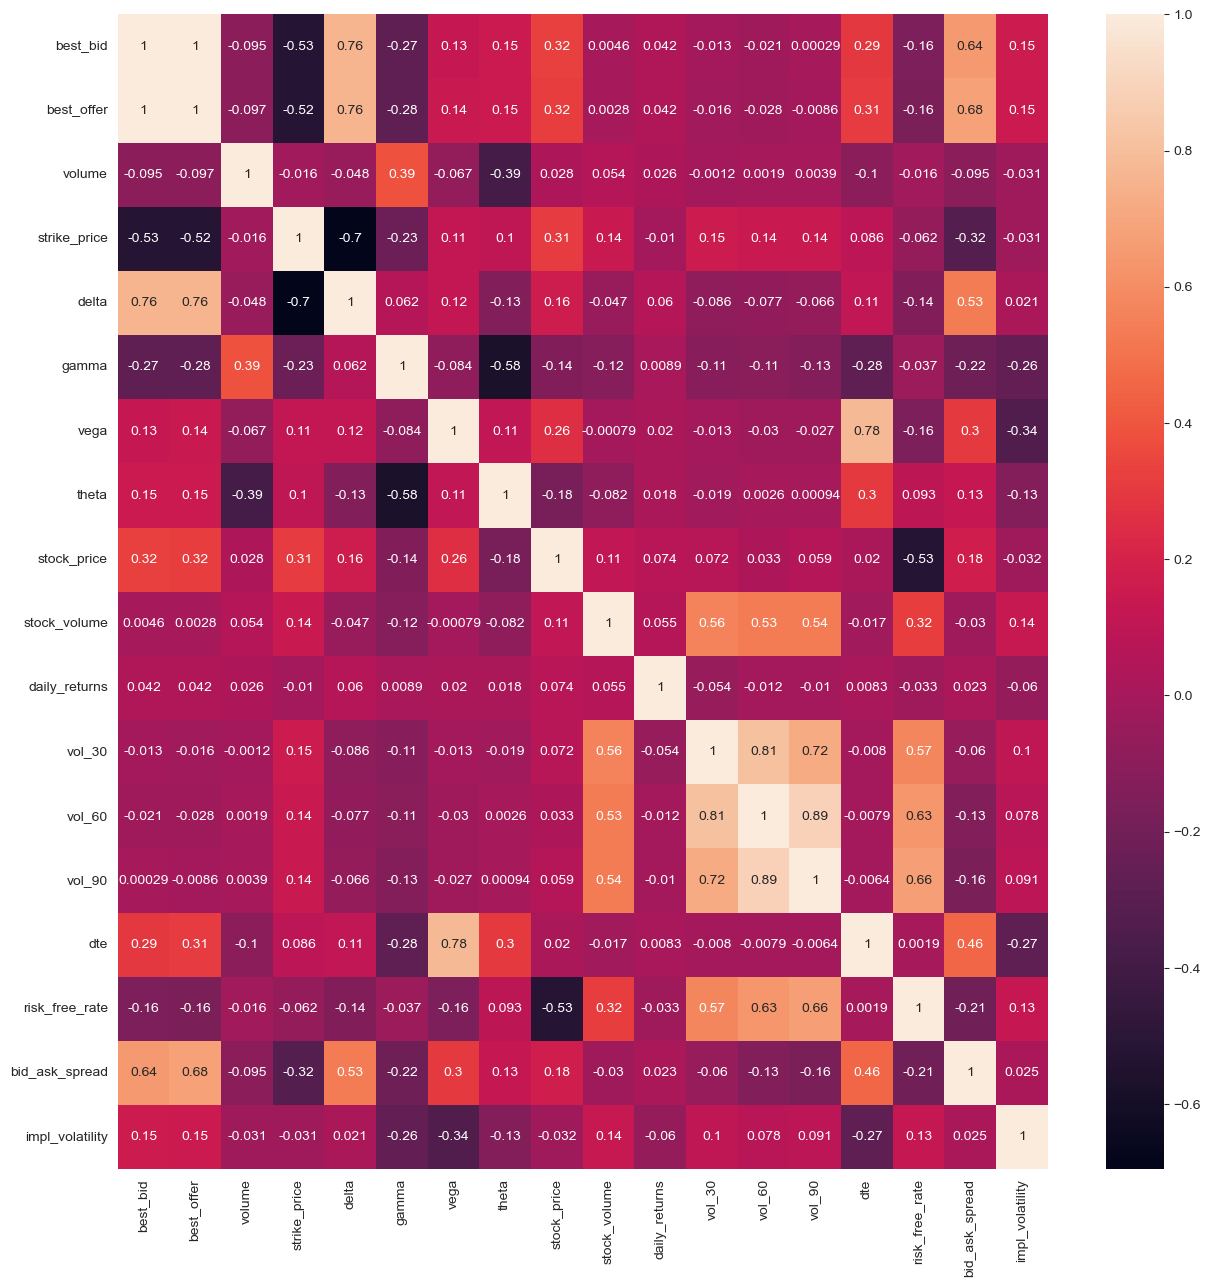

In [66]:
# Correlation plot of all the variables

columns_corr = ['best_bid', 'best_offer', 
                'volume','strike_price', 'delta', 
                'gamma', 'vega', 'theta',  
                'stock_price', 'stock_volume', 'daily_returns',
                'vol_30', 'vol_60', 'vol_90', 'dte', 'risk_free_rate', 
                'bid_ask_spread', 'impl_volatility']


fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
     
data = calls[columns_corr]
calls_correlation_matrix=data.corr()
sns.heatmap(calls_correlation_matrix, annot=True, ax=ax)
plt.show()

The Heat map suggest that the implied volatility has strong correlation with those features: 'best_bid', 'best_offer', 'stock_volume', 'r', 'vol_30', 

In [67]:
# Show the correlation values
calls_sorted_corr_val = calls_correlation_matrix['impl_volatility'].sort_values(ascending=False)
print(calls_sorted_corr_val)


impl_volatility    1.000000
best_bid           0.152767
best_offer         0.148598
stock_volume       0.135378
risk_free_rate     0.128952
vol_30             0.100433
vol_90             0.091081
vol_60             0.077820
bid_ask_spread     0.024876
delta              0.021184
strike_price      -0.030829
volume            -0.031299
stock_price       -0.032376
daily_returns     -0.060475
theta             -0.128923
gamma             -0.260335
dte               -0.272866
vega              -0.344365
Name: impl_volatility, dtype: float64


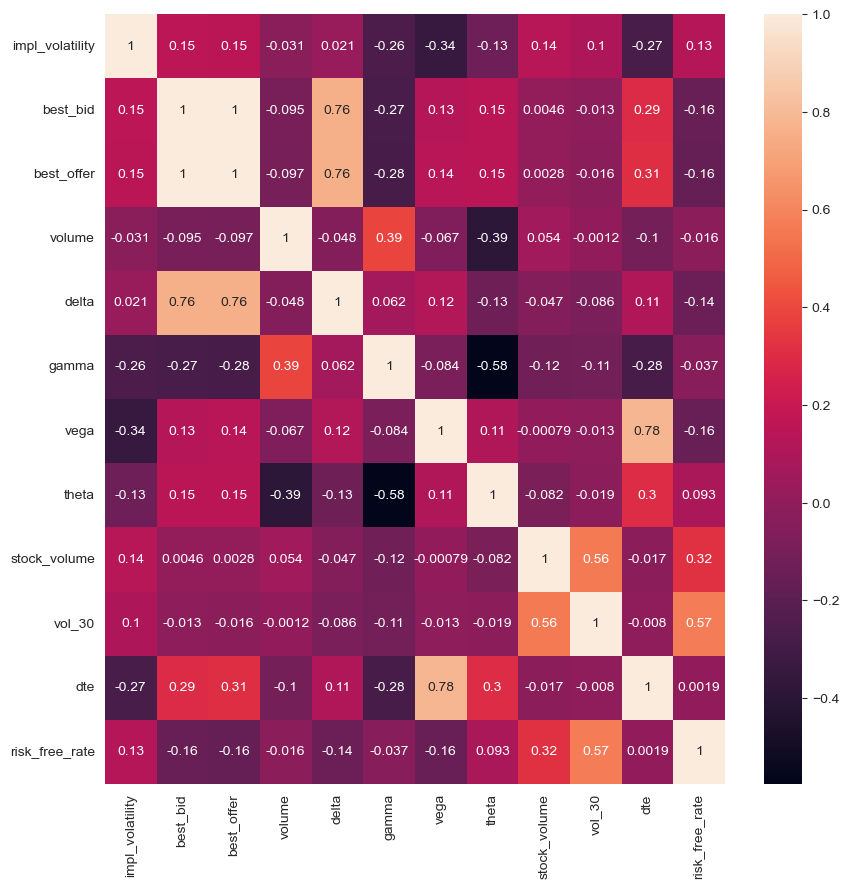

In [68]:
# Correlation plot of all the variables

columns_corr = ['impl_volatility','best_bid', 'best_offer', 
                'volume', 'delta', 
                'gamma', 'vega', 'theta',  
                 'stock_volume',
                'vol_30', 'dte', 'risk_free_rate']

# columns_corr = ['best_bid', 'best_offer', 
#                 'volume','strike_price', 'delta', 
#                 'gamma', 'vega', 'theta',  
#                 'stock_price', 'stock_volume', 'daily_returns',
#                 'vol_30', 'vol_60', 'vol_90', 'dte', 'risk_free_rate', 
#                 'bid_ask_spread', 'impl_volatility']

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
     
data = calls[columns_corr]
calls_correlation_matrix=data.corr()
sns.heatmap(calls_correlation_matrix, annot=True, ax=ax)
plt.show()

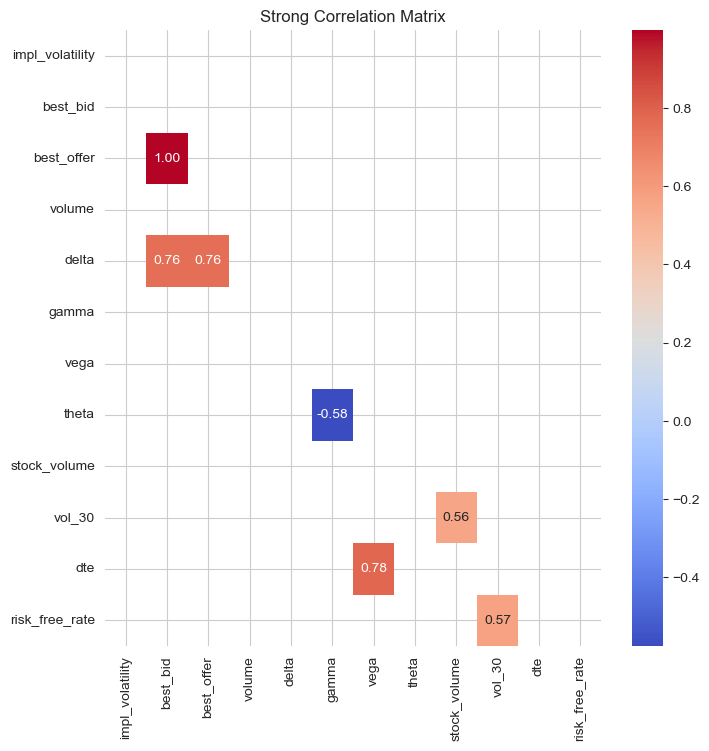

In [69]:

# Set the threshold for strong correlation (absolute value)
threshold = 0.5  # You can adjust this threshold as needed

# Filter the correlation matrix to show only strong correlations
strong_correlation_matrix = calls_correlation_matrix[(calls_correlation_matrix > threshold) | (calls_correlation_matrix < -threshold)]

# Mask out the diagonal and upper triangle of the correlation matrix
mask = np.triu(np.ones_like(strong_correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(strong_correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Strong Correlation Matrix')
plt.show()

#### Puts heat map

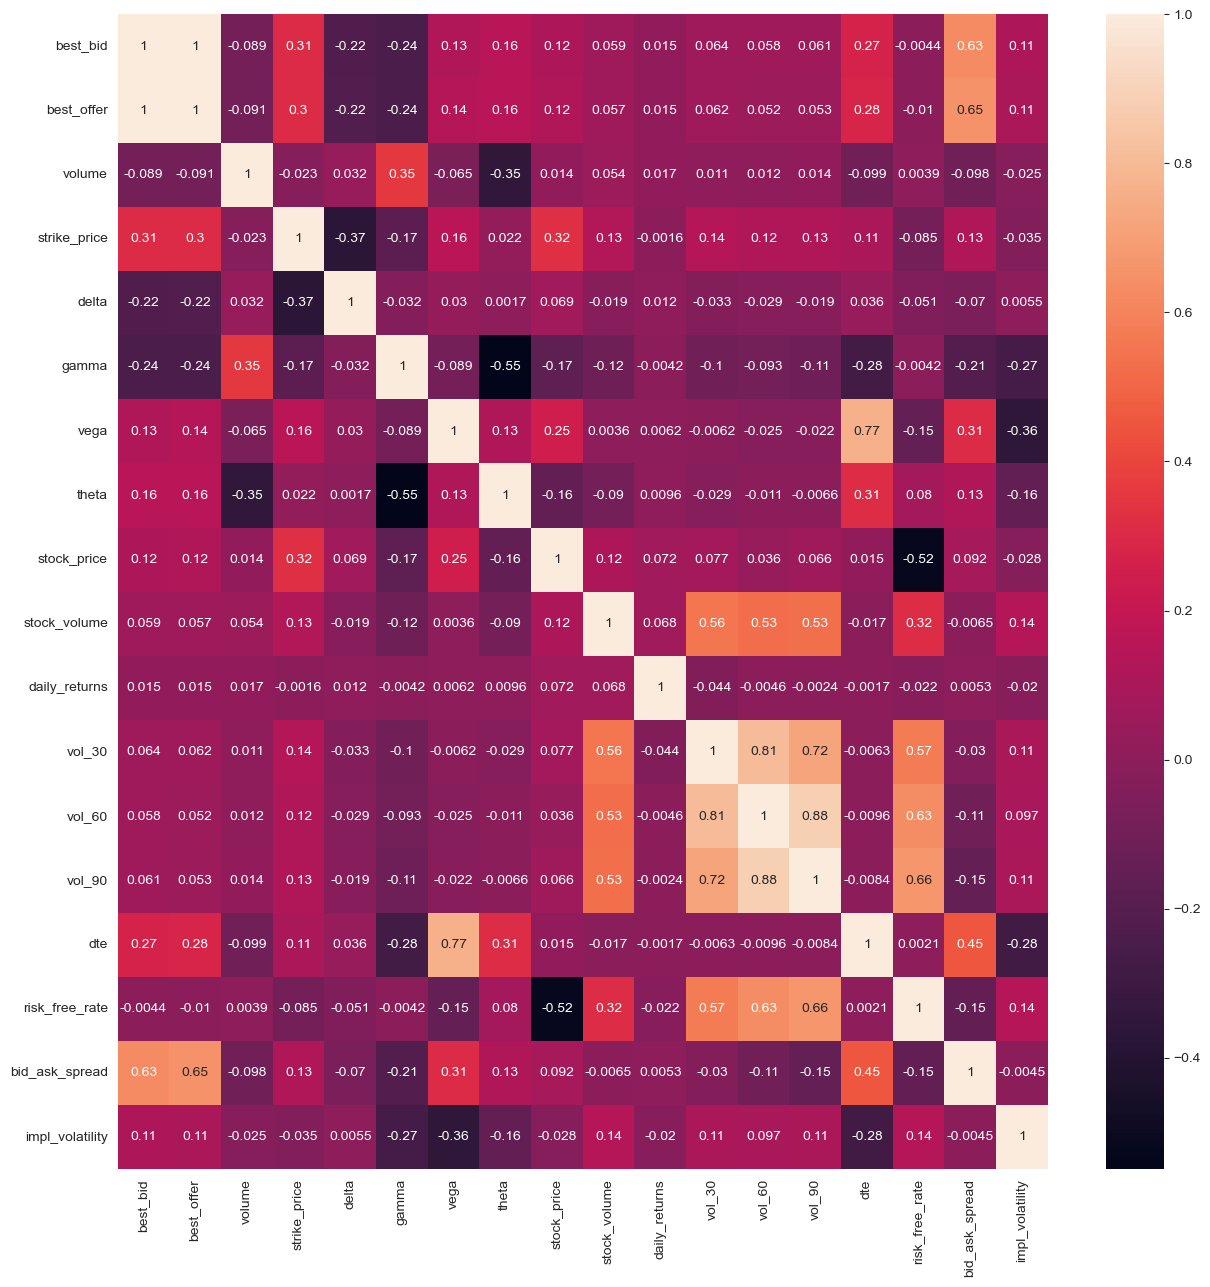

In [70]:
# Correlation plot of all the variables

columns_corr = ['best_bid', 'best_offer', 
                'volume','strike_price', 'delta', 
                'gamma', 'vega', 'theta',  
                'stock_price', 'stock_volume', 'daily_returns',
                'vol_30', 'vol_60', 'vol_90', 'dte', 'risk_free_rate', 
                'bid_ask_spread', 'impl_volatility']

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

     
data = df[columns_corr]
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix, annot=True, ax=ax)
plt.show()


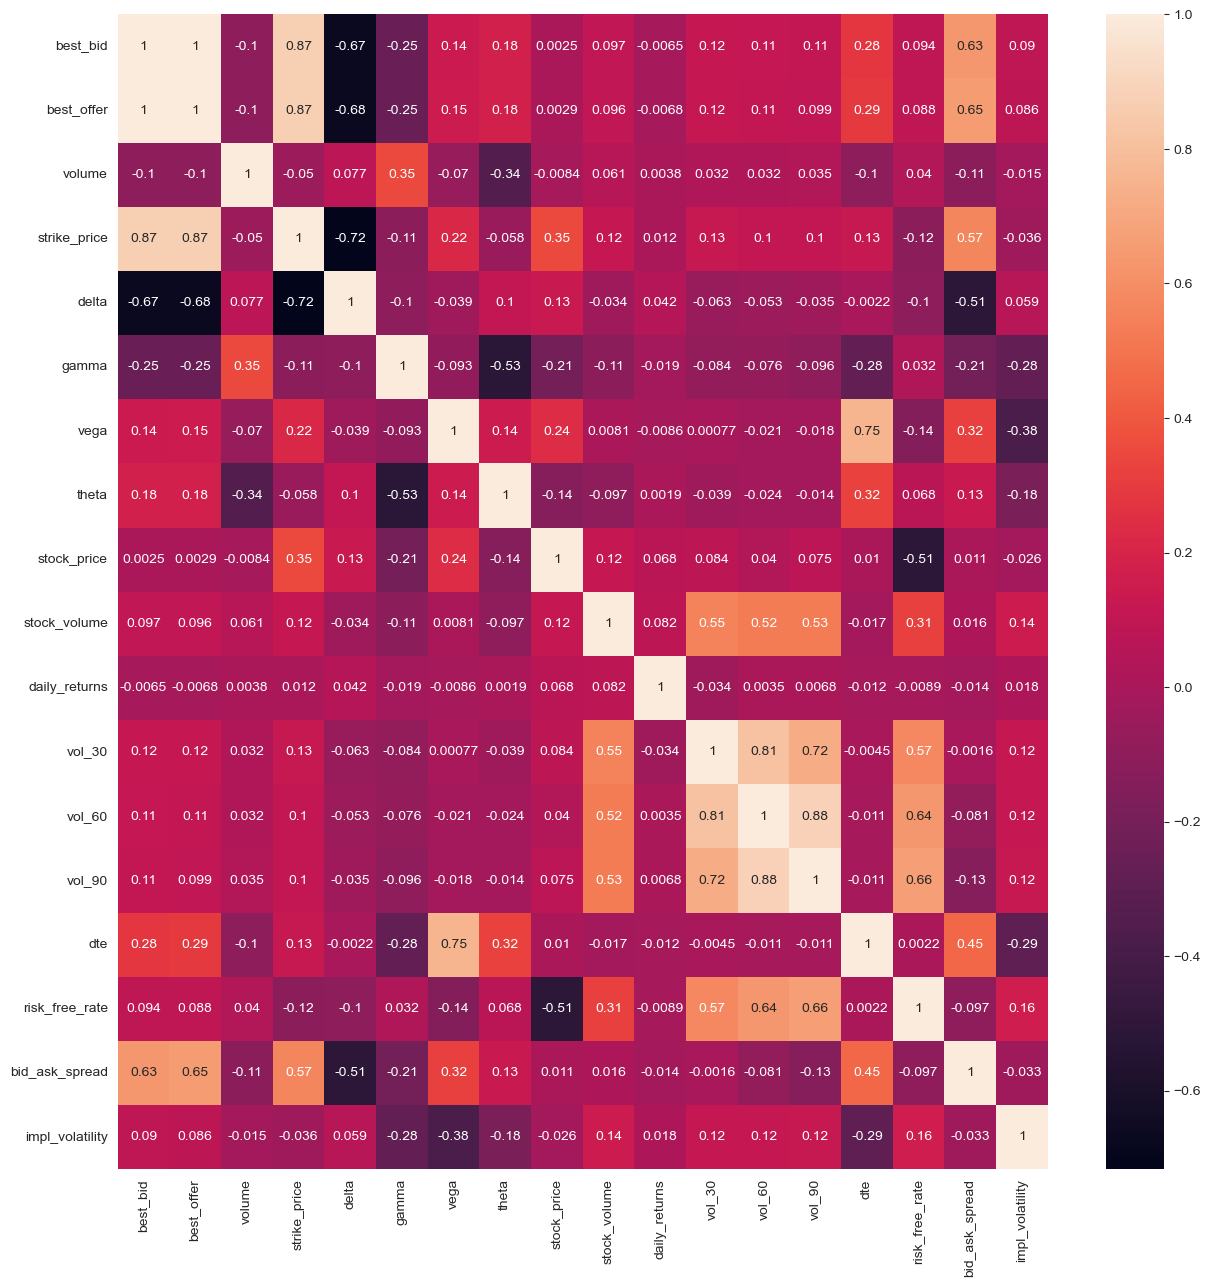

In [71]:
# Correlation plot of all the variables

columns_corr = ['best_bid', 'best_offer', 
                'volume','strike_price', 'delta', 
                'gamma', 'vega', 'theta',  
                'stock_price', 'stock_volume', 'daily_returns',
                'vol_30', 'vol_60', 'vol_90', 'dte', 'risk_free_rate', 
                'bid_ask_spread', 'impl_volatility']


fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
     
data = puts[columns_corr]
puts_correlation_matrix=data.corr()
sns.heatmap(puts_correlation_matrix, annot=True, ax=ax)
plt.show()

In [72]:
# Show the correlation values
puts_sorted_corr_val = puts_correlation_matrix['impl_volatility'].sort_values(ascending=False)
print(puts_sorted_corr_val)


impl_volatility    1.000000
risk_free_rate     0.158124
stock_volume       0.144128
vol_90             0.123849
vol_30             0.120358
vol_60             0.115931
best_bid           0.089674
best_offer         0.086476
delta              0.059434
daily_returns      0.017665
volume            -0.014603
stock_price       -0.025616
bid_ask_spread    -0.032873
strike_price      -0.036376
theta             -0.179085
gamma             -0.276702
dte               -0.290722
vega              -0.376255
Name: impl_volatility, dtype: float64


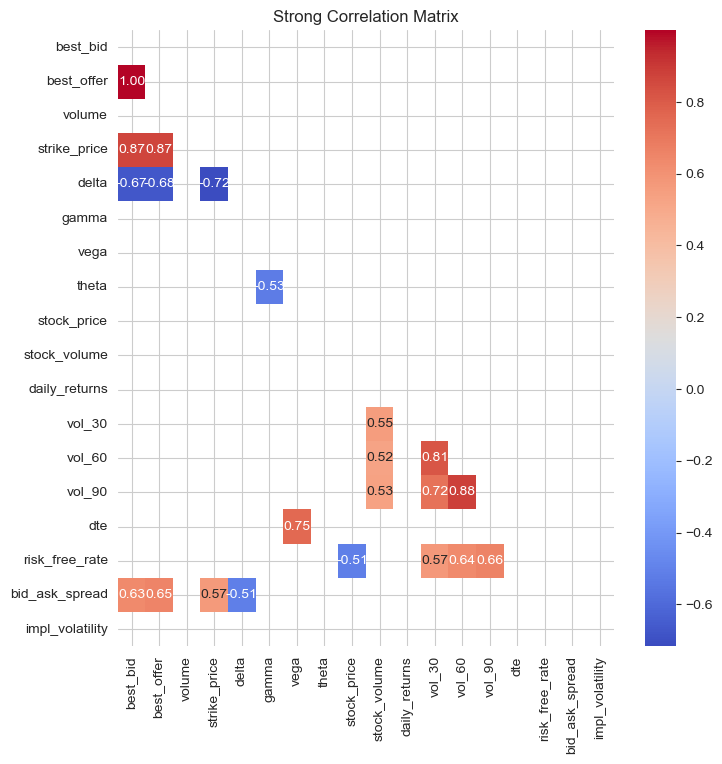

In [73]:

# Set the threshold for strong correlation (absolute value)
threshold = 0.5  # You can adjust this threshold as needed

# Filter the correlation matrix to show only strong correlations
strong_correlation_matrix = puts_correlation_matrix[(puts_correlation_matrix > threshold) | (puts_correlation_matrix < -threshold)]

# Mask out the diagonal and upper triangle of the correlation matrix
mask = np.triu(np.ones_like(strong_correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(strong_correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Strong Correlation Matrix')
plt.show()

### Calls Pair Plot

<Figure size 1200x800 with 0 Axes>

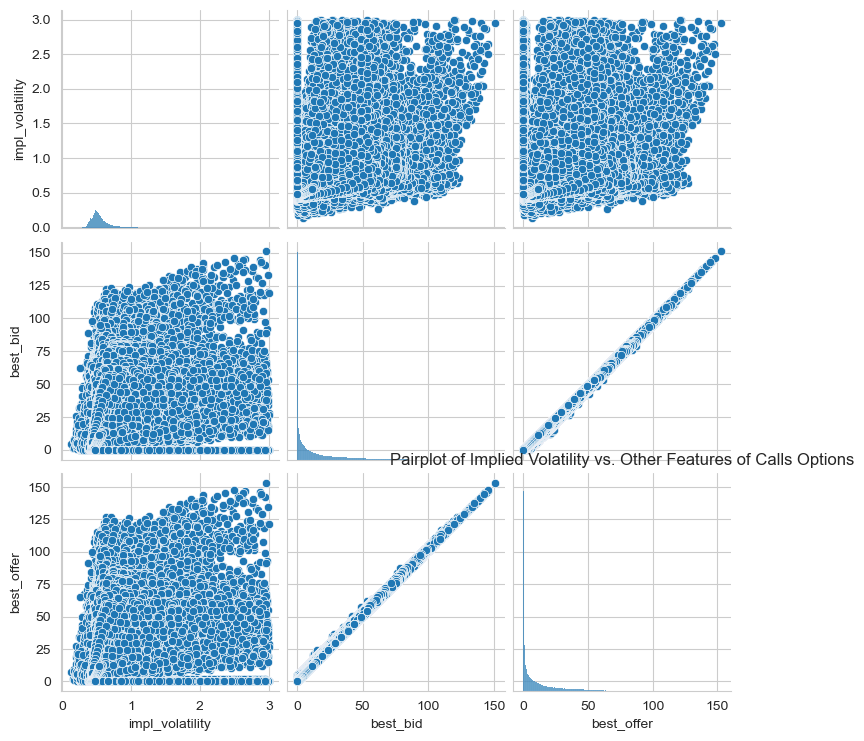

In [74]:
# Scatter plot of implied volatility vs. other numerical features
plt.figure(figsize=(12, 8))

sns.pairplot(calls, vars=['impl_volatility', 'best_bid', 'best_offer',])
plt.title('Pairplot of Implied Volatility vs. Other Features of Calls Options')
plt.show()
 

<Figure size 1200x800 with 0 Axes>

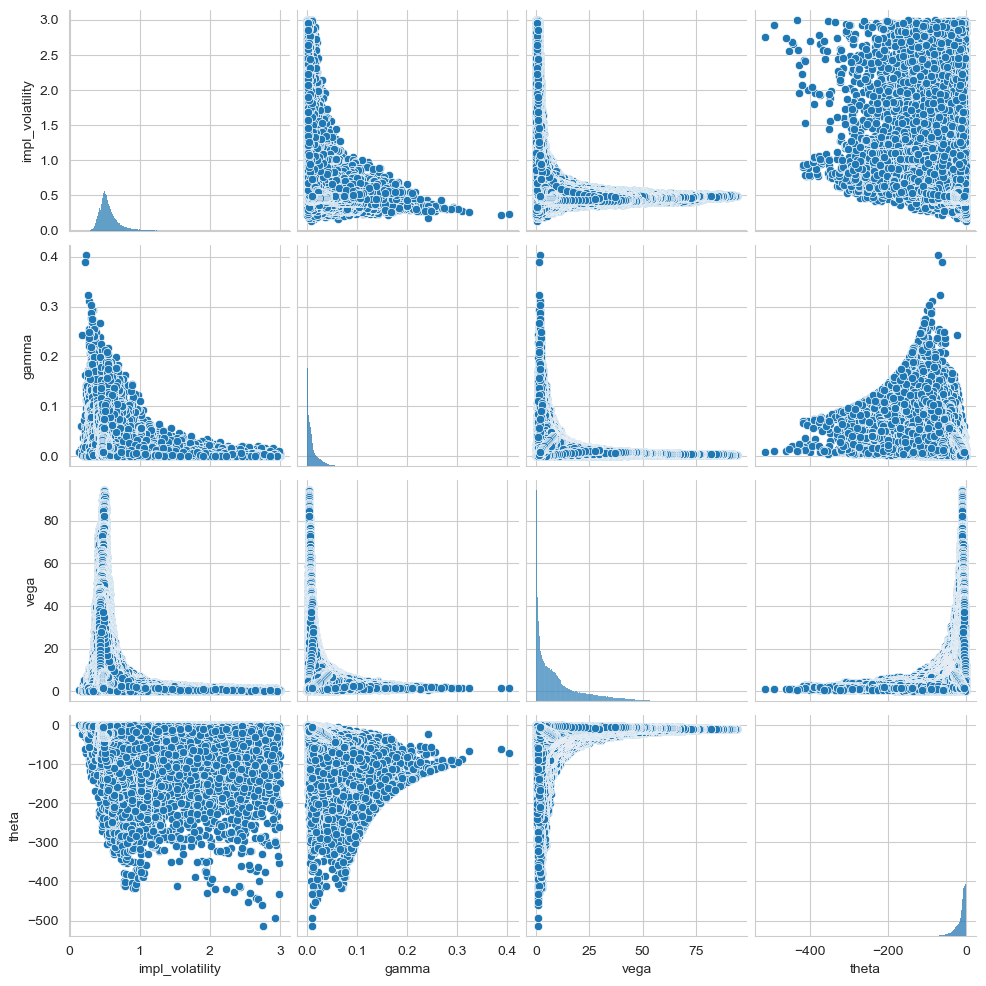

In [75]:
# Scatter plot of implied volatility vs. other numerical features
plt.figure(figsize=(12, 8))

sns.pairplot(calls, vars=['impl_volatility', 'gamma', 'vega', 'theta'])
# plt.title('Pairplot of Implied Volatility vs. Other Features of Calls options')
plt.show()
 

<Figure size 1200x800 with 0 Axes>

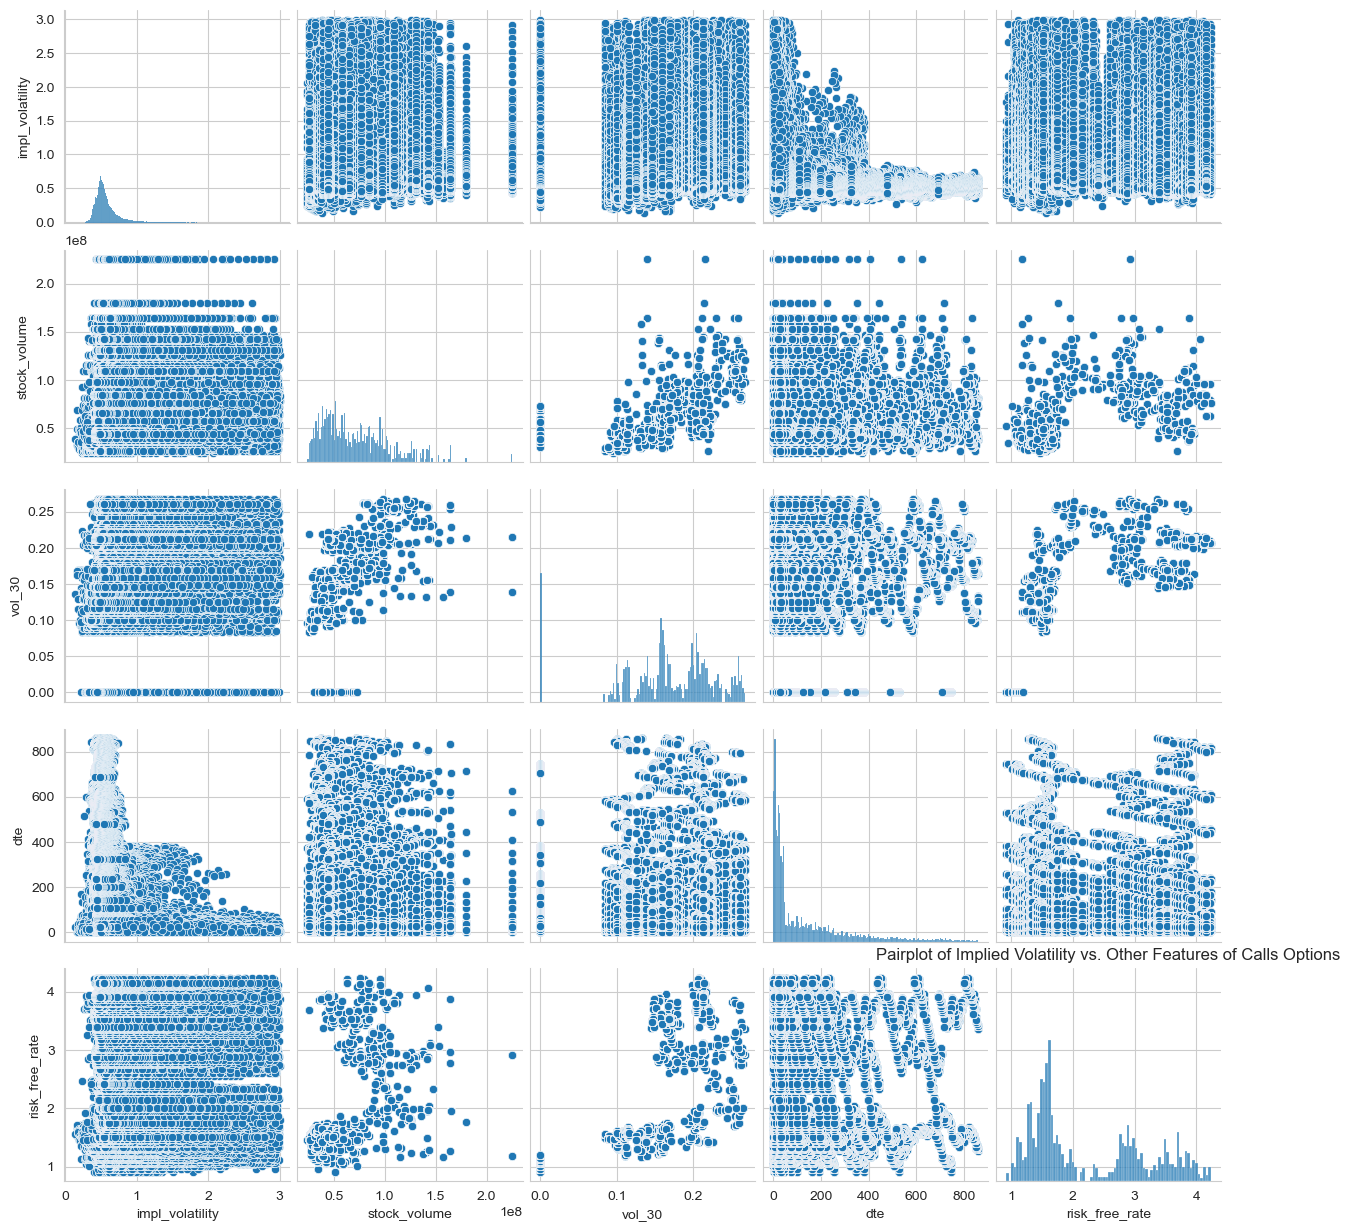

In [76]:
# Scatter plot of implied volatility vs. other numerical features
plt.figure(figsize=(12, 8))

sns.pairplot(calls, vars=['impl_volatility', 'stock_volume',
                          'vol_30', 'dte', 'risk_free_rate' ])
plt.title('Pairplot of Implied Volatility vs. Other Features of Calls Options')
plt.show()
 